## **Heart Disease**

![](https://www.bhf.org.uk/-/media/news-images/2022/august/high-tech-heart-640-x-410.jpg?h=65%25&w=100%25&rev=438e06b33b22403cb338a98263d00d4c&hash=C97704C9EAFC16F2C4E0373B223AC3E5)

*🔍 Delving into Heart Disease Prediction: My meticulous EDA journey and innovative ML techniques, featuring XGBoost, Random Forest, and Neural Networks, empower robust predictive models. The project unfolds intricate cardiovascular patterns, refines diagnostics, and propels advancements in predictive modeling. Excited to share impactful transformations in cardiovascular health analytics! *

## `Main Liberaries`

In [1]:
!pip install sklearn_features

In [2]:
# main liberares
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px
import plotly.graph_objects as go
import missingno as msn
import warnings
warnings.filterwarnings("ignore")


# preprocessing
from sklearn import utils
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, cross_val_predict
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn_features.transformers import DataFrameSelector


# model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import xgboost as xgb

# deep learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


# metrics

from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score, precision_recall_curve, average_precision_score,classification_report

## `The Data`

In [3]:
# read the Data
file_path = "/kaggle/input/heart-disease-dataset/heart.csv"

# Read the csv file if is founded

if os.path.exists(file_path):
    
    df = pd.read_csv(file_path)
    print(df.head())
    
else:
    print("The File does not exist.")

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [4]:
# show the head of the data
df.head(7)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


## Columns

`age`: Age of the individual.

`sex`: Gender, where 1 represents male and 0 represents female.

`cp`: Chest pain type (0, 1, 2, 3).

`trestbps`: Resting blood pressure (in mm Hg).

`chol`: Serum cholesterol level (in mg/dl).

`fbs`: Fasting blood sugar > 120 mg/dl (1 for true, 0 for false).

`restecg`: Resting electrocardiographic results (0, 1, 2).

`thalach`: Maximum heart rate achieved.

`exang`: Exercise induced angina (1 for yes, 0 for no).

`oldpeak`: ST depression induced by exercise relative to rest.

`slope`: The slope of the peak exercise ST segment.

`ca`: Number of major vessels (0-3) colored by fluoroscopy.

`thal`: Thalassemia type (1, 2, 3).

`target`: Presence of heart disease (1 for yes, 0 for no).

In [5]:
# some info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# some describtions
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


## `Exploratory Data Analysis (EDA)`

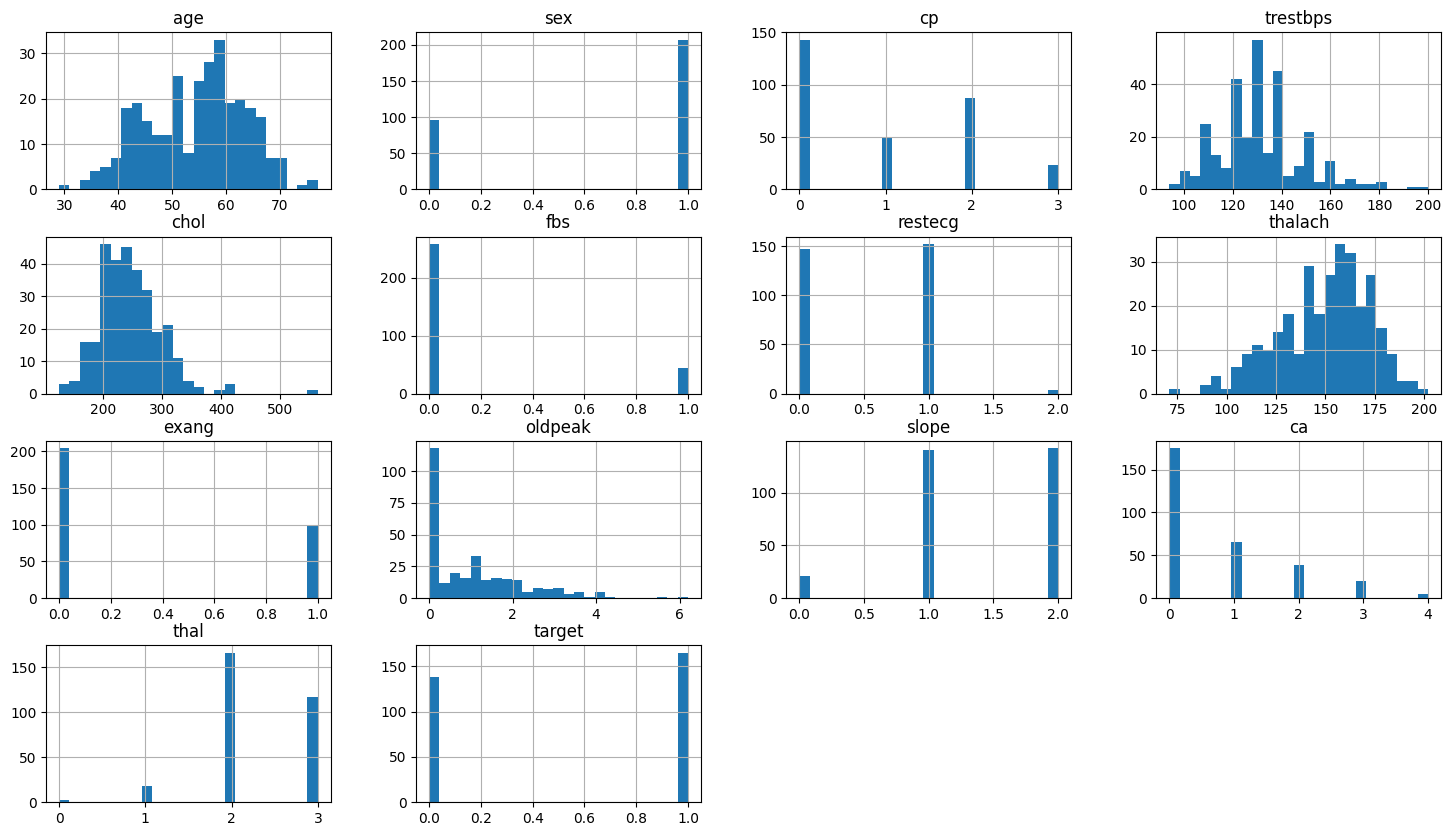

In [7]:
# histograme
df.hist(figsize=(18, 10), bins=25);

In [8]:
# Age Distribution
fig_age = px.histogram(df, x='age', title='Age Distribution')
fig_age.show()

In [9]:
# Gender Distribution
fig_gender = px.pie(df, names='sex', title='Gender Distribution', labels={1: 'Male', 0: 'Female'})
fig_gender.show()


In [10]:
# Resting Blood Pressure Distribution
fig_bp = px.histogram(df, x='trestbps', title='Resting Blood Pressure Distribution',
                      color_discrete_sequence=['pink'])
fig_bp.show()

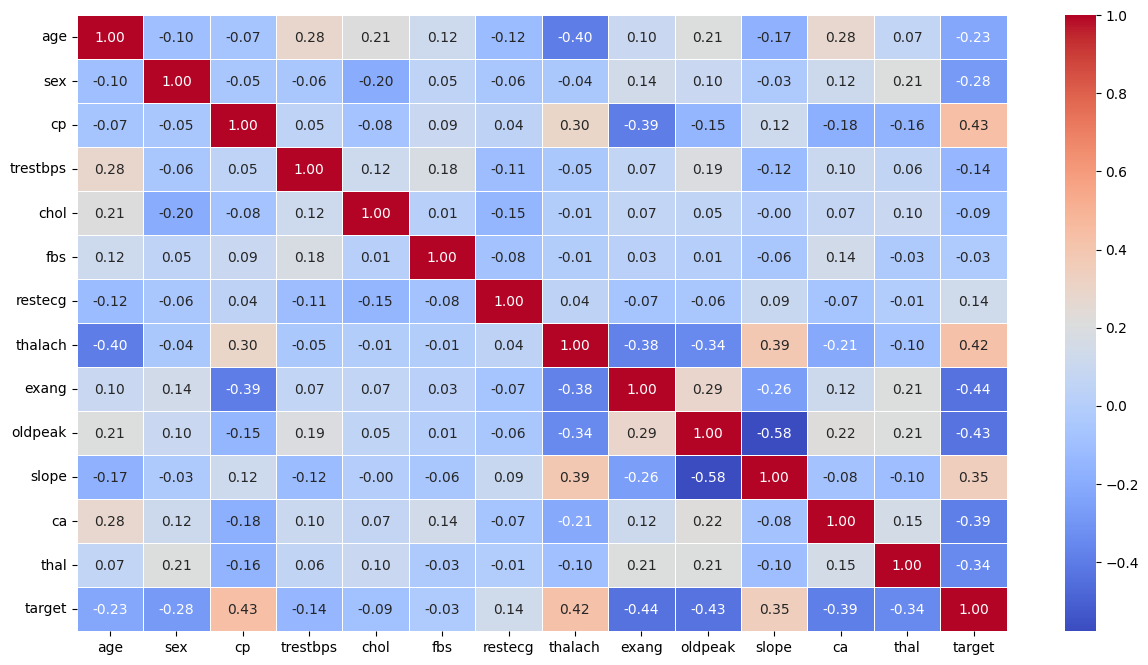

In [11]:
# Correlation Heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(data=df.corr(), annot=True, fmt="0.2f", cmap='coolwarm', linewidths=.5)
plt.show()

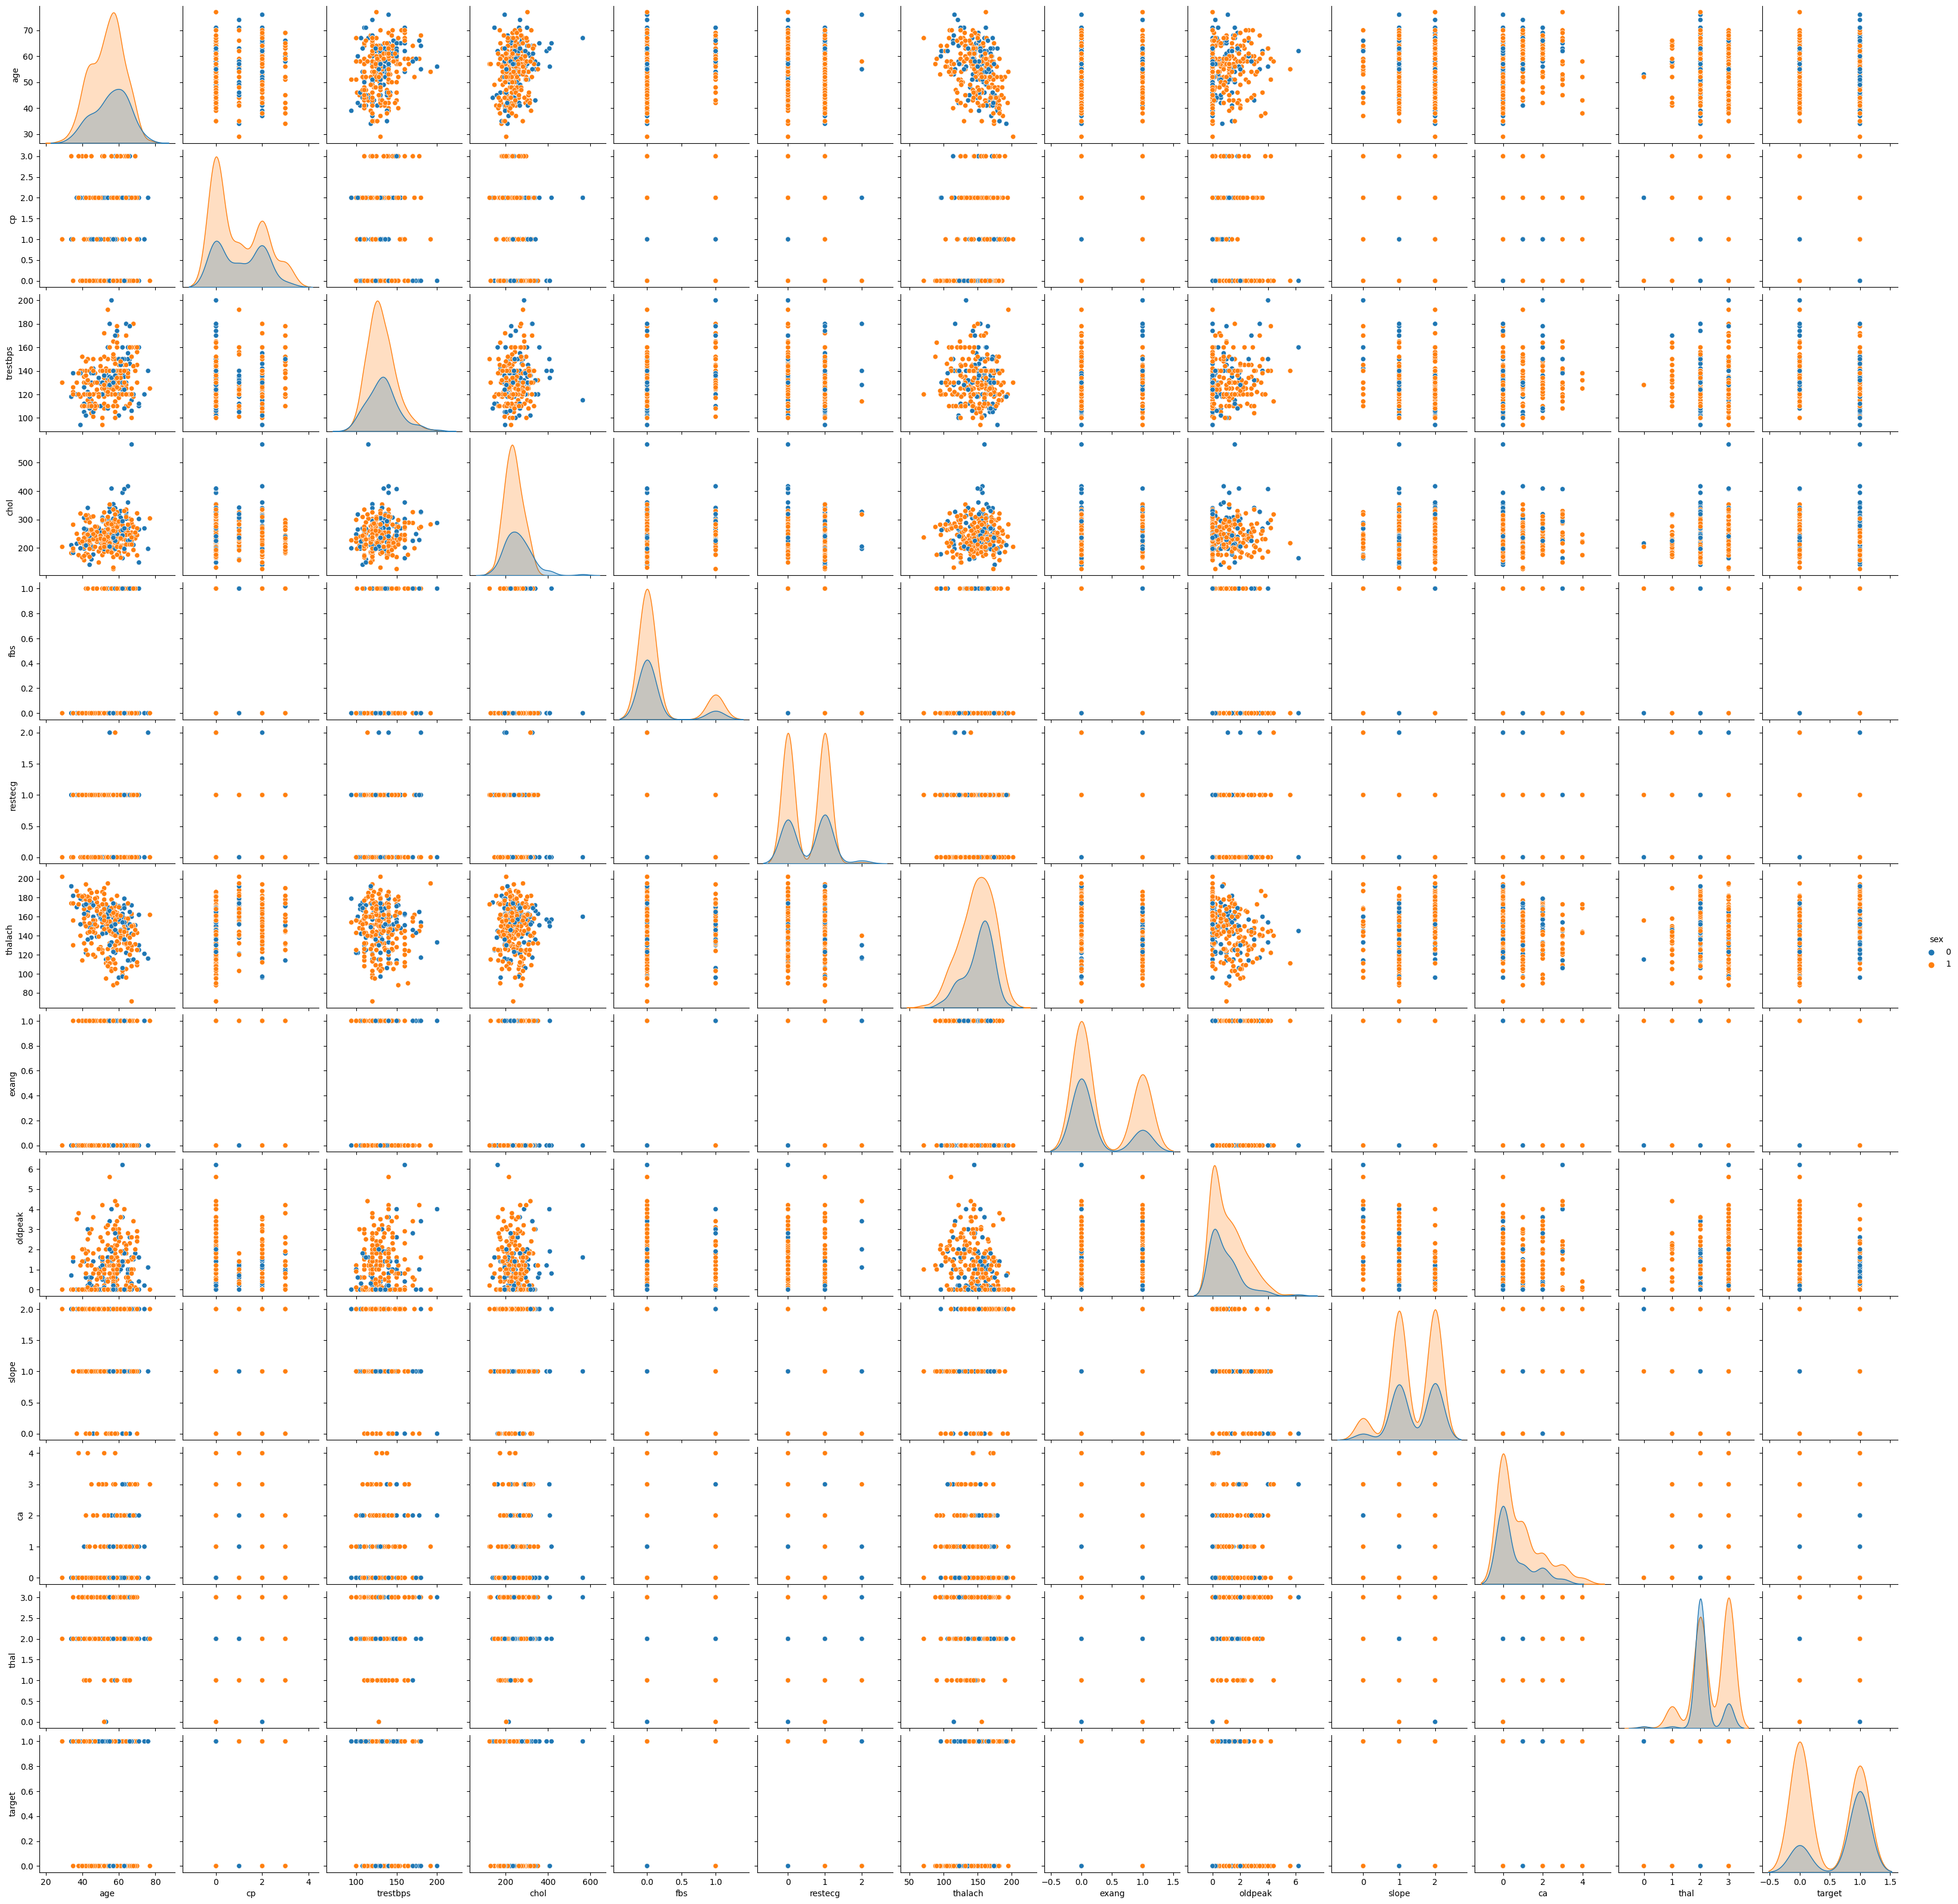

In [12]:
# Creating a pairplot
sns.pairplot(df, diag_kind='kde', hue="sex")
plt.show()


In [13]:
# value counts
cp_count = df["cp"].value_counts()
cp_count

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

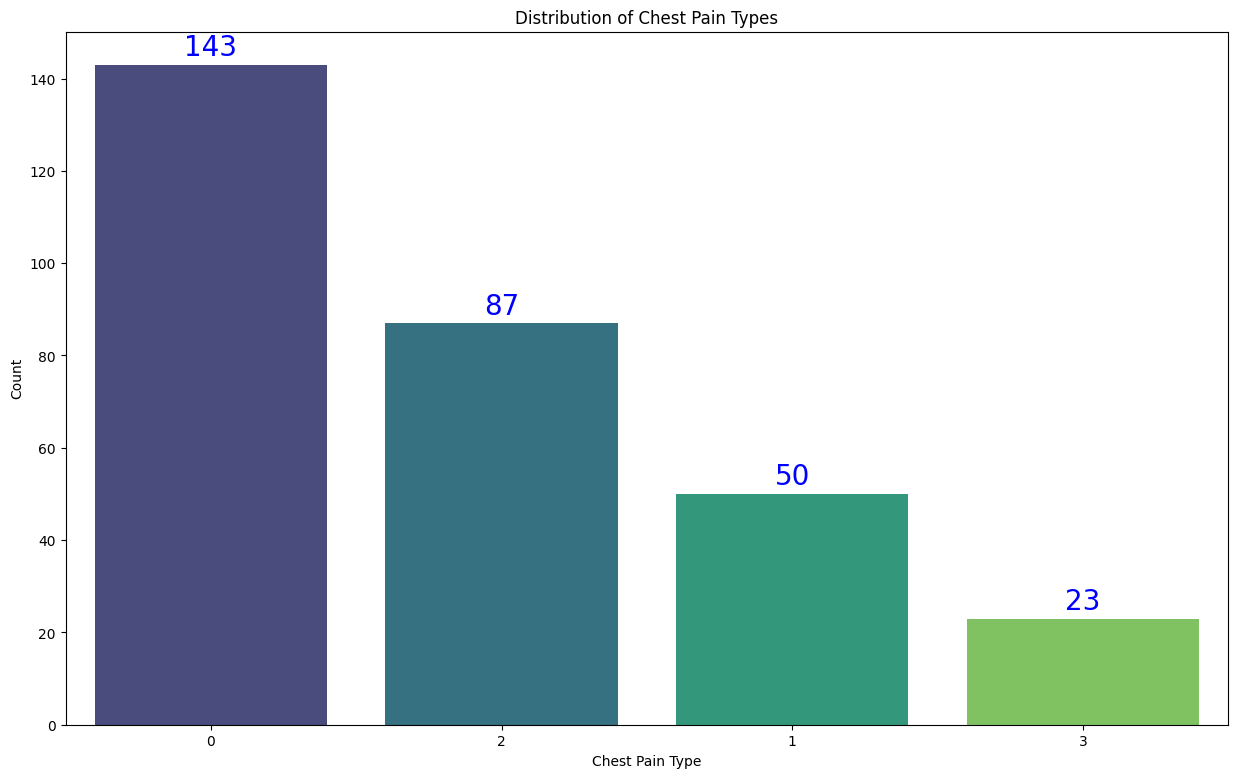

In [14]:
#  Bar Chart for Chest Pain Type
plt.figure(figsize=(15, 9))
sns.countplot(x='cp', data=df, palette='viridis', order=cp_count.index)
plt.title('Distribution of Chest Pain Types')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')

# show the counts
for i in range(cp_count.shape[0]):
    plt.text(x=i, y=cp_count.values[i]+2, s=cp_count.values[i], ha="center", fontsize=20, color="blue")
plt.show()

In [15]:
#Serum Cholesterol Level Distribution
fig_chol = px.histogram(df, x='chol', title='Serum Cholesterol Level Distribution',
                       color_discrete_sequence=['green'])
fig_chol.show()

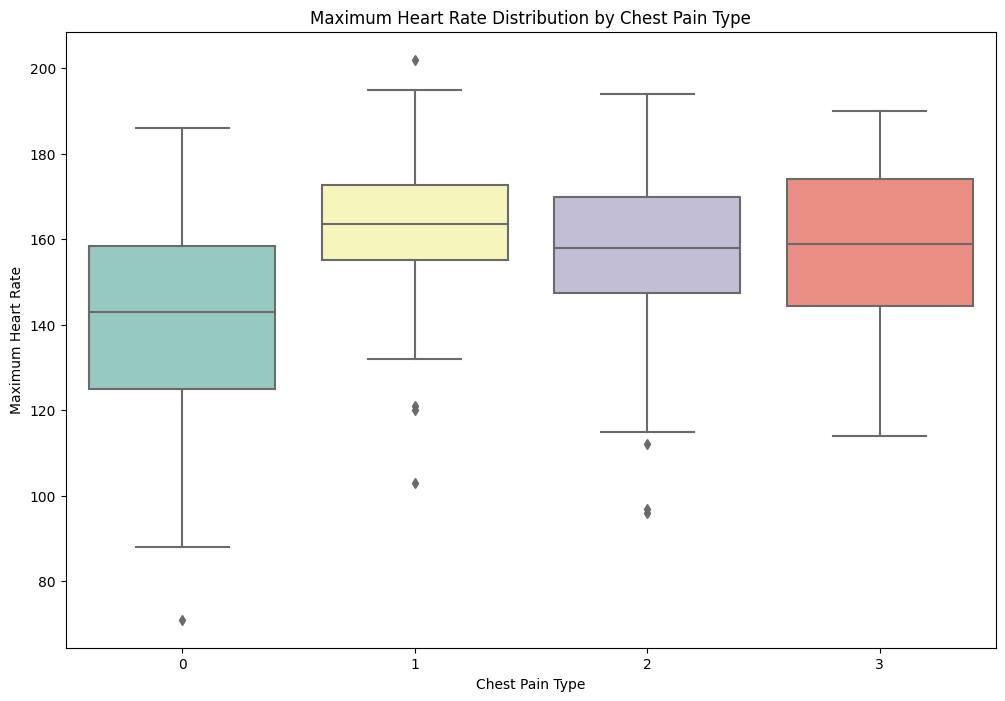

In [16]:
# Box Plot for Maximum Heart Rate by Chest Pain Type
plt.figure(figsize=(12, 8))
sns.boxplot(x='cp', y='thalach', data=df, palette='Set3')
plt.title('Maximum Heart Rate Distribution by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Maximum Heart Rate')
plt.show()

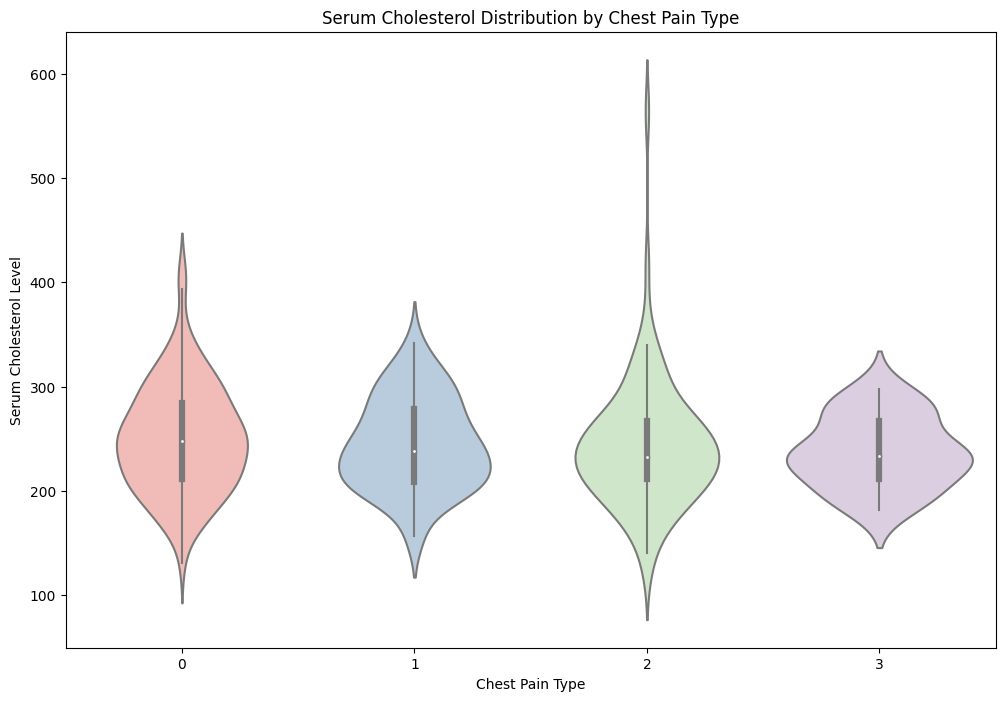

In [17]:
# Violin Plot for Serum Cholesterol by Chest Pain Type
plt.figure(figsize=(12, 8))
sns.violinplot(x='cp', y='chol', data=df, palette='Pastel1')
plt.title('Serum Cholesterol Distribution by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Serum Cholesterol Level')
plt.show()

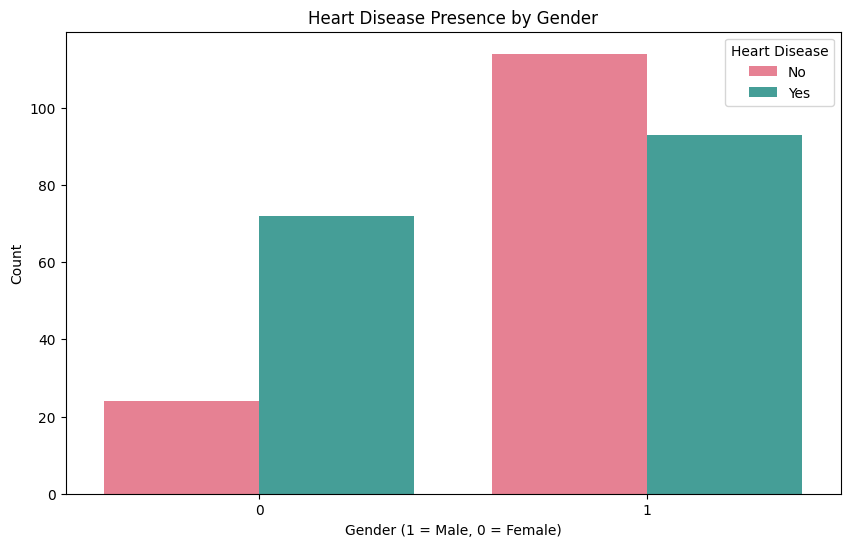

In [18]:
# Bar Chart for Heart Disease Presence by Gender
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', hue='target', data=df, palette='husl')
plt.title('Heart Disease Presence by Gender')
plt.xlabel('Gender (1 = Male, 0 = Female)')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

<Axes: >

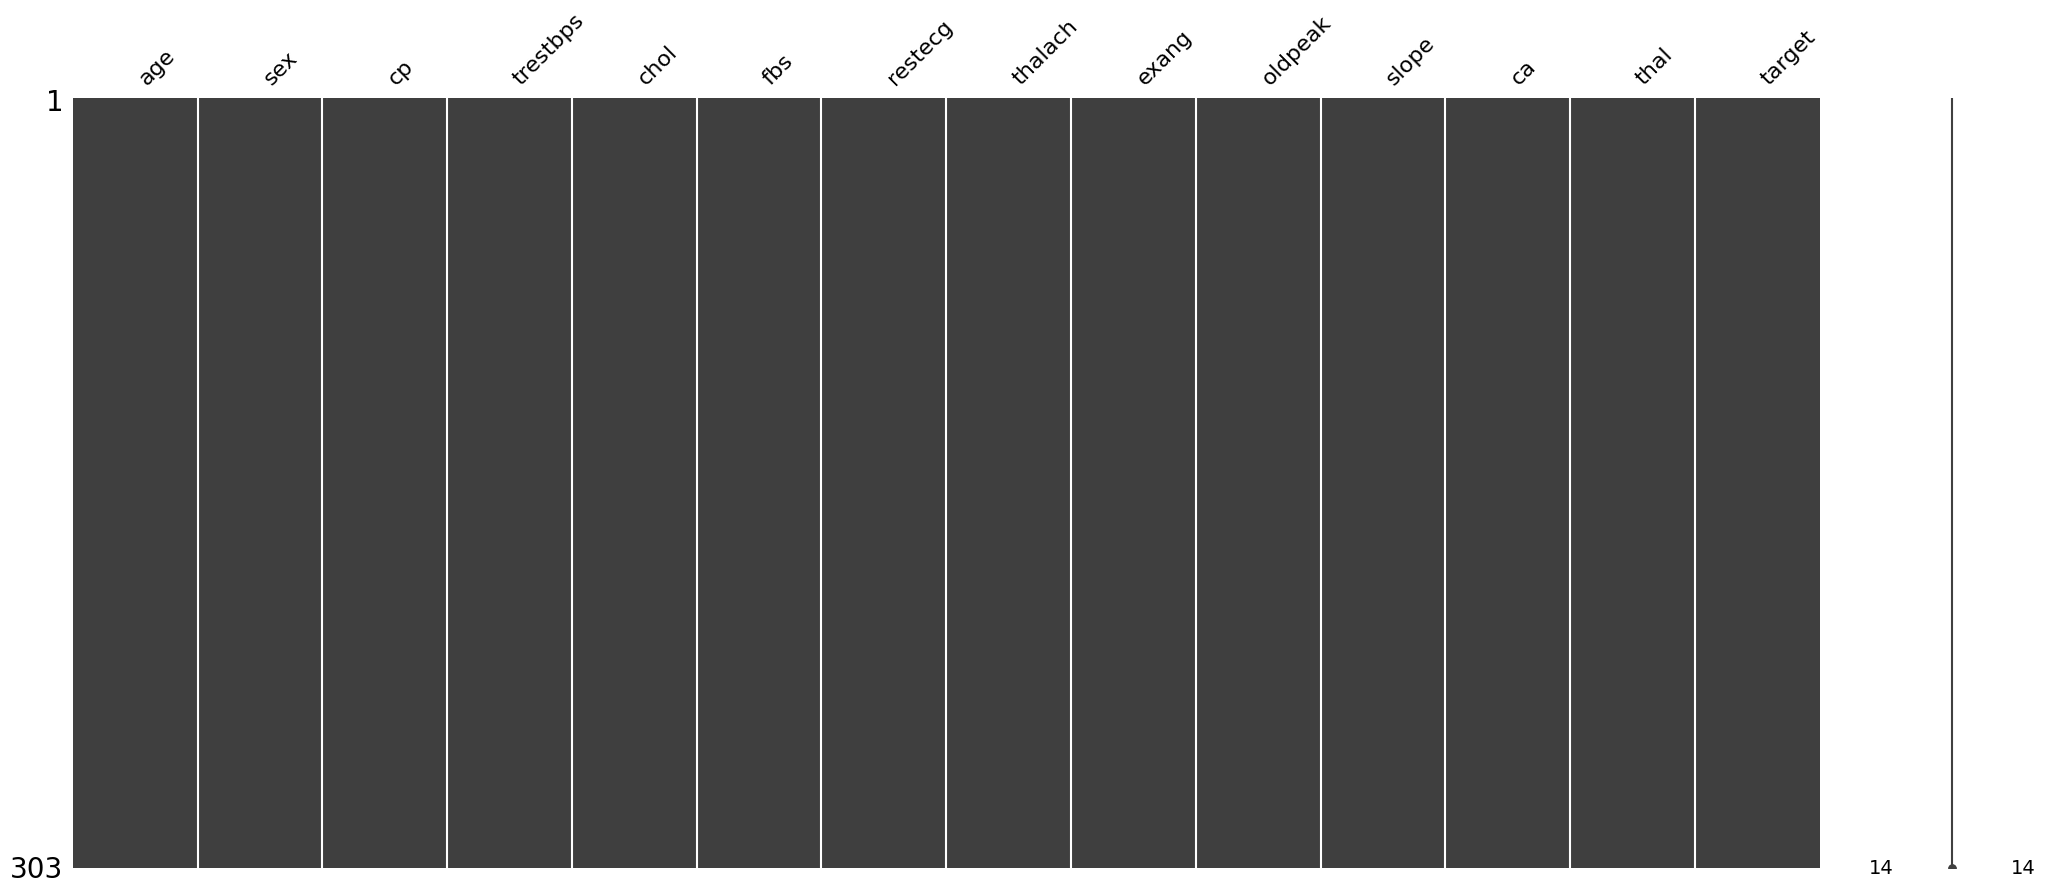

In [19]:
# check nulls using missingno 
msn.matrix(df)

<Axes: >

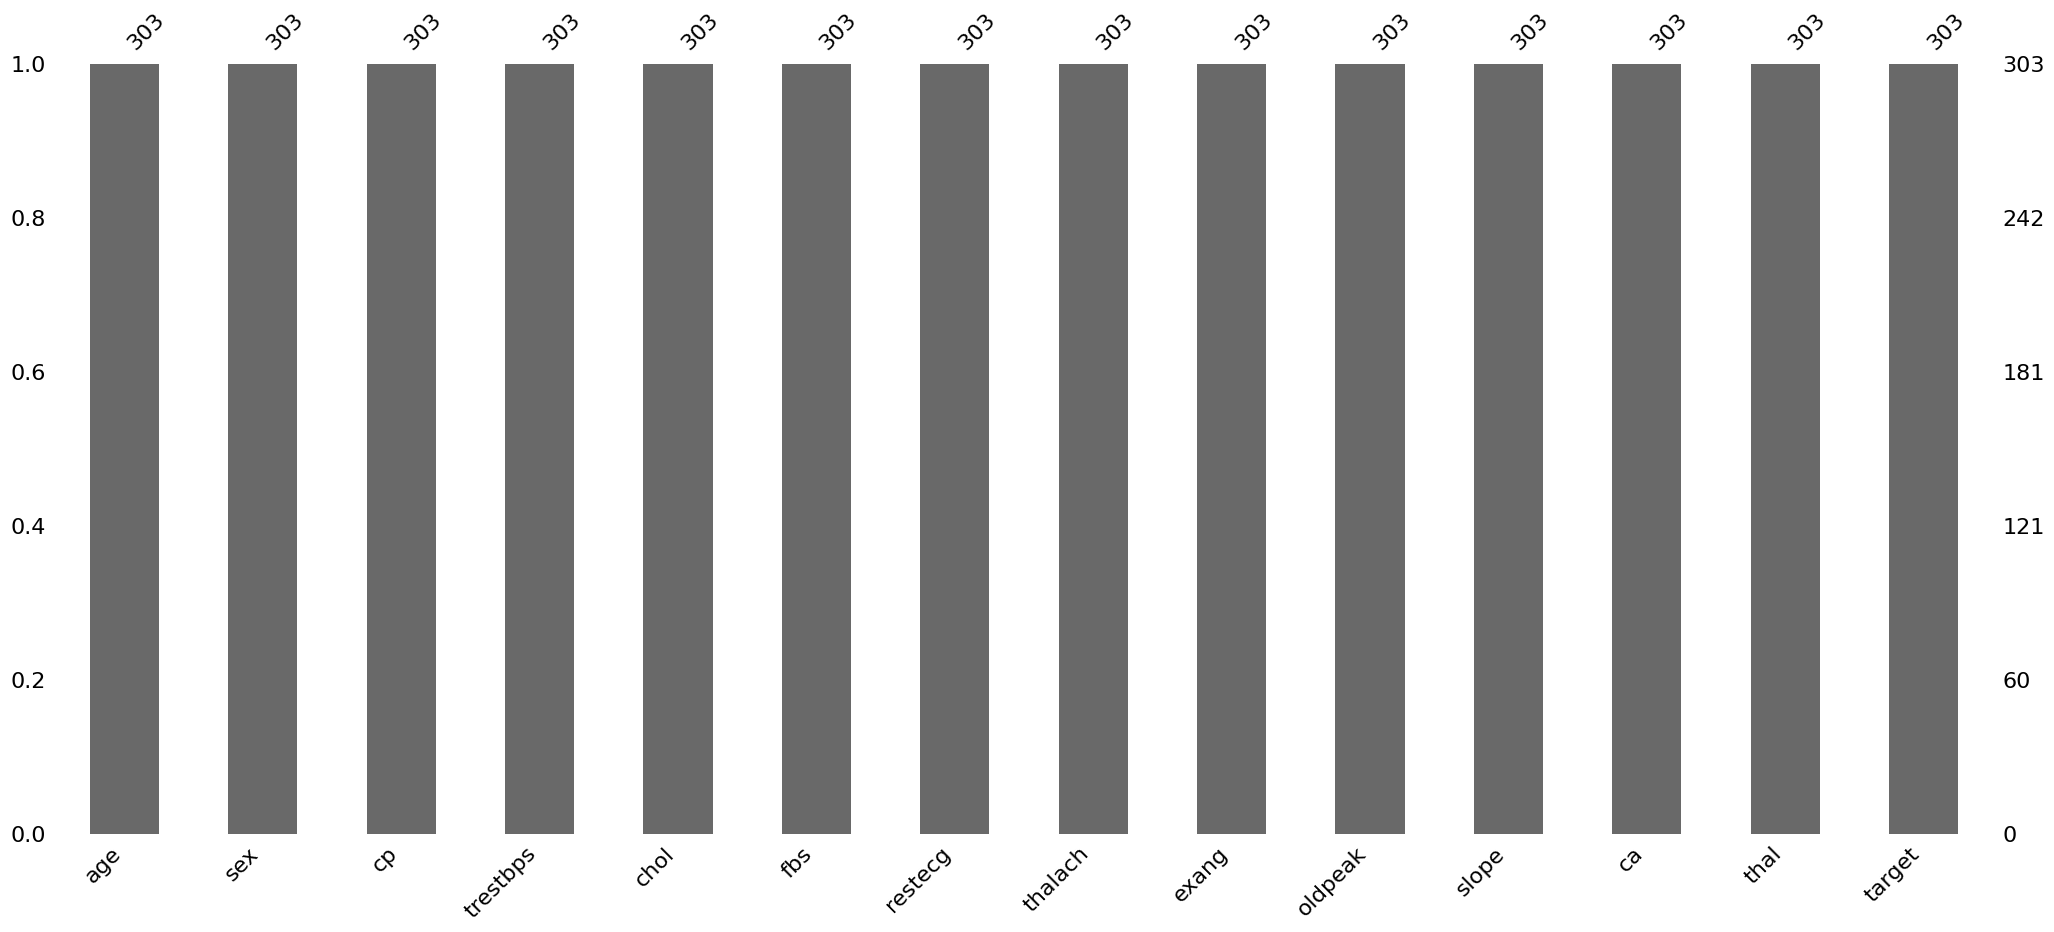

In [20]:
msn.bar(df)

In [21]:
# check the nulls using pandas
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## `Data Preprocessing`

### creating a new feature

In [22]:
# Body Mass Index
df['bmi'] = (df['chol'] / df['trestbps']) * df['thalach']
# Age Group
df['age_group'] = pd.cut(df['age'], bins=[29, 39, 49, 59, 69, 79], labels=['30-39', '40-49', '50-59', '60-69', '70-79'])
# Exercise Induced Angina Binary
df['exang_binary'] = df['exang'].apply(lambda x: 1 if x == 1 else 0)
# Average of Resting Blood Pressure and Maximum Heart Rate
df['avg_bp_max_heart_rate'] = (df['trestbps'] + df['thalach']) / 2
# Cholesterol Category
df['cholesterol_category'] = pd.cut(df['chol'], bins=[0, 199, 239, float('inf')], labels=['Normal', 'Borderline High', 'High'])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   age                    303 non-null    int64   
 1   sex                    303 non-null    int64   
 2   cp                     303 non-null    int64   
 3   trestbps               303 non-null    int64   
 4   chol                   303 non-null    int64   
 5   fbs                    303 non-null    int64   
 6   restecg                303 non-null    int64   
 7   thalach                303 non-null    int64   
 8   exang                  303 non-null    int64   
 9   oldpeak                303 non-null    float64 
 10  slope                  303 non-null    int64   
 11  ca                     303 non-null    int64   
 12  thal                   303 non-null    int64   
 13  target                 303 non-null    int64   
 14  bmi                    303 non-null    flo

In [24]:
# categorical columns
categorical_columns = [col for col in df.columns if df[col].dtype == object or df[col].dtype == 'category']
categorical_columns

['age_group', 'cholesterol_category']

In [25]:
# make encodeing using LabelEncoder
df_copy = df.copy()
for col in categorical_columns:
    df_copy.loc[:, col] = LabelEncoder().fit_transform(df_copy.loc[:, col])

In [26]:
df_copy

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,bmi,age_group,exang_binary,avg_bp_max_heart_rate,cholesterol_category
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,241.034483,3,0,147.5,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,359.615385,0,0,158.5,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,269.907692,1,0,151.0,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,350.066667,2,0,149.0,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,480.850000,2,1,141.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,211.735714,2,1,131.5,1
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,316.800000,1,0,121.0,1
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,188.979167,3,0,142.5,2
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,115.884615,2,1,122.5,2


In [27]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,bmi,age_group,exang_binary,avg_bp_max_heart_rate,cholesterol_category
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,241.034483,60-69,0,147.5,Borderline High
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,359.615385,30-39,0,158.5,High
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,269.907692,40-49,0,151.0,Borderline High
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,350.066667,50-59,0,149.0,Borderline High
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,480.850000,50-59,1,141.5,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,211.735714,50-59,1,131.5,High
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,316.800000,40-49,0,121.0,High
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,188.979167,60-69,0,142.5,Normal
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,115.884615,50-59,1,122.5,Normal


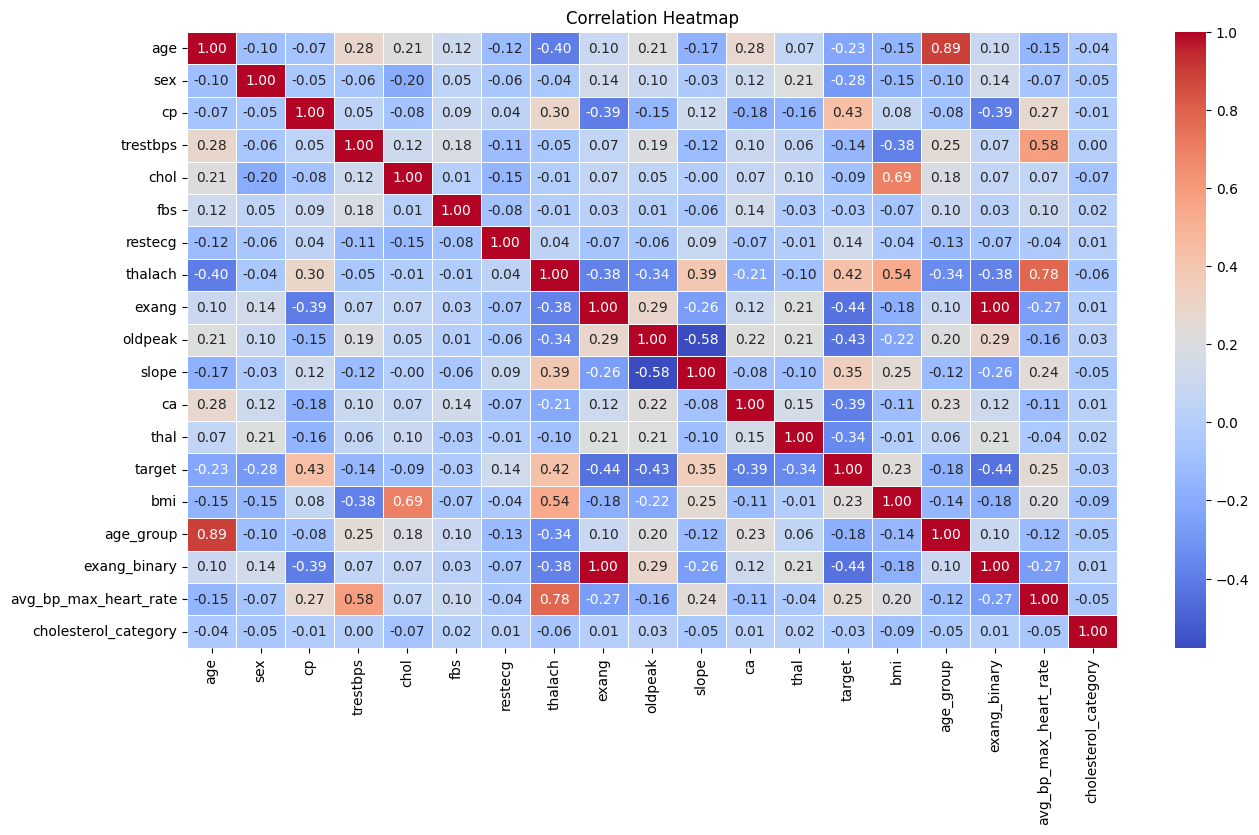

In [28]:
# Correlation Heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(data=df_copy.corr(), annot=True, fmt="0.2f", cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

### Split

In [29]:
X = df.drop(columns=["target"], axis=1) # Features
y = df["target"]  # target

In [30]:
# this func to check if there are numeric columns or categorical columns and return them
def check(X):
    
    # numeric columns
    numeric_columns = [col for col in X.columns if X[col].dtype != object and X[col].dtype != 'category']
    
    # categorical columns
    categorical_columns = [col for col in df.columns if df[col].dtype == object or df[col].dtype == 'category']
    
    if numeric_columns and categorical_columns:
        
        return numeric_columns, categorical_columns
    
    elif numeric_columns:
        
        return numeric_columns
    
        
    else:
        return categorical_columns
        
numeric_columns, categorical_columns = check(X)

In [31]:
# numeric columns
numeric_columns

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'bmi',
 'exang_binary',
 'avg_bp_max_heart_rate']

In [32]:
# categorical columns
categorical_columns

['age_group', 'cholesterol_category']

### Pipeline

In [33]:
# numerical pipeline to solve the nan and make Standardization
num_pipeline = Pipeline(steps=[
                            ("selector", DataFrameSelector(numeric_columns)), # ==> To select the numeric cols from the Data
                            ("Imputer", SimpleImputer(strategy="median") ),
                            ("Scaler", StandardScaler())
                                ])


# categorical pipeline 
cate_pipeline = Pipeline(steps=[
                 ("selector", DataFrameSelector(categorical_columns)),# ==> To select the categorical cols from the Data
                 ("Imputer", SimpleImputer(strategy="constant", fill_value="missing")),
                 ("Label", OneHotEncoder(sparse=False))
                ])

In [34]:
def Preprocessing(X):
    numeric_columns = [col for col in X.columns if X[col].dtype != object]
    categorical_columns = [col for col in X.columns if X[col].dtype == object or X[col].dtype == 'category']
    if numeric_columns and categorical_columns:
        # Total pipeline to concatenate the num_pipeline and cate_pipeline
        total_pipeline = FeatureUnion(transformer_list=[
            ("num_pipeline", num_pipeline),
            ("cate_pipeline", cate_pipeline)
        ])
        # Make fitting
        X_final = total_pipeline.fit_transform(X)
        return X_final

    elif numeric_columns and not categorical_columns:
        # Make fitting
        X_final = num_pipeline.fit_transform(X)
        return X_final

    elif categorical_columns and not numeric_columns:
        # Make fitting for categorical pipeline only
        X_final = cate_pipeline.fit_transform(X[categorical_columns])
        return X_final

    else:
        return "Please provide either numeric_columns, categorical_columns, or both."

X_final = Preprocessing(X)
print(f"X_final is = {X_final}")

X_final is = [[ 0.9521966   0.68100522  1.97312292 ...  1.          0.
   0.        ]
 [-1.91531289  0.68100522  1.00257707 ...  0.          1.
   0.        ]
 [-1.47415758 -1.46841752  0.03203122 ...  1.          0.
   0.        ]
 ...
 [ 1.50364073  0.68100522 -0.93851463 ...  0.          0.
   1.        ]
 [ 0.29046364  0.68100522 -0.93851463 ...  0.          0.
   1.        ]
 [ 0.29046364 -1.46841752  0.03203122 ...  1.          0.
   0.        ]]


### Splitting The Data

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.20, random_state=42, shuffle=True)

In [36]:
# show the shapes
print(f"the X_train shape is {X_train.shape}")
print(f"the y_train shape is {y_train.shape}")
print(f"the X_test shape is {X_test.shape}")
print(f"the y_test shape is {y_test.shape}")

the X_train shape is (242, 25)
the y_train shape is (242,)
the X_test shape is (61, 25)
the y_test shape is (61,)


## `The Model & Hyperparameters Tunning`

### RandomForestClassifier

In [37]:
# tunnig the hyperparameters
forest = RandomForestClassifier()

param = {
    "n_estimators" : [i for i in range(150, 300, 20)],
    "max_depth" : [i for i in range(5, 10, 3)],
    'criterion' : ["gini", "entropy", "log_loss"],
}

grid_search = GridSearchCV(estimator=forest, param_grid=param, scoring="precision", cv=5, n_jobs=-1)

# fitting
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 8],
                         'n_estimators': [150, 170, 190, 210, 230, 250, 270,
                                          290]},
             scoring='precision')

In [38]:
# best params
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 5, 'n_estimators': 170}

In [39]:
# the final model 
forest_cls = grid_search.best_estimator_

the scores is ==> [0.85714286 0.82758621 0.79310345 0.76666667 0.83333333]
the mean to the scores is ==> 0.8155665024630542
****************************************************************************************************


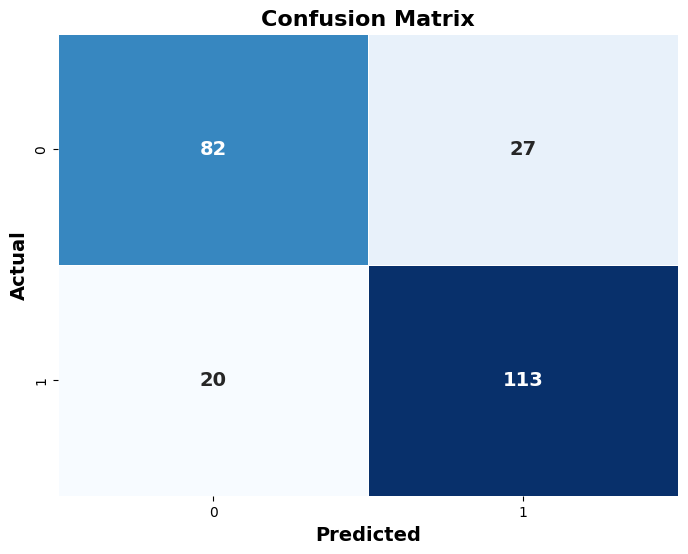

In [40]:
# make croos validation
croos_val = cross_val_score(estimator=forest_cls, X=X_train, y=y_train,
                            cv=5, scoring="precision", n_jobs=-1)
# print the croos val for every fold
print(f"the scores is ==> {croos_val}")

# show the mean for the scores
print(f"the mean to the scores is ==> {croos_val.mean()}")

print("**"*50)

# make croos validation to predict
croos_val_pred = cross_val_predict(estimator=forest_cls, X=X_train, y=y_train, 
                                   cv=5, method="predict", n_jobs=-1 )

# Compute the confusion matrix
confusion = confusion_matrix(y_train, croos_val_pred)

# Create a heatmap with Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'size': 14, 'weight': 'bold'}, linewidths=.5)

# Customize labels and title
plt.xlabel('Predicted', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=14, fontweight='bold')
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.show()

In [41]:
# show the feature importance 
importance = forest_cls.feature_importances_
importance

array([0.05359633, 0.03295197, 0.10002094, 0.0395886 , 0.03962638,
       0.00473532, 0.00835386, 0.07224106, 0.05730235, 0.12536629,
       0.04389779, 0.12716105, 0.07790741, 0.04161487, 0.0789608 ,
       0.05554204, 0.00120565, 0.00652051, 0.00483321, 0.00957908,
       0.00087868, 0.        , 0.00994942, 0.00452987, 0.00363653])

In [42]:
# the scores
print(f"the score in the train is {forest_cls.score(X_train, y_train)}")
print(f"the score in the test is {forest_cls.score(X_test, y_test)}")

the score in the train is 0.9504132231404959
the score in the test is 0.8852459016393442


In [43]:
# prediction
y_pred_RF = forest_cls.predict(X_test)
pd.DataFrame(np.c_[y_pred_RF, y_test], columns=["prediction", "Actual"])

,prediction,Actual
0,0,0
1,1,0
2,1,1
3,0,0
4,1,1
...,...,...
56,0,0
57,1,1
58,0,0
59,0,0


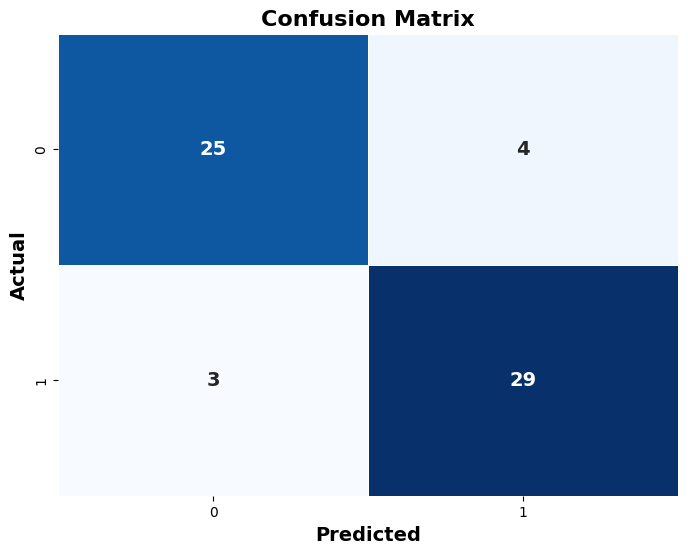

In [44]:
# Compute the confusion matrix
confusion = confusion_matrix(y_test, y_pred_RF)

# Create a heatmap with Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'size': 14, 'weight': 'bold'}, linewidths=.5)

# Customize labels and title
plt.xlabel('Predicted', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=14, fontweight='bold')
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.show()


In [45]:
print("\033[1mThe Classification Report on Test Data\033[0m\n")
classification_rep = classification_report(y_test, y_pred_RF)
print(classification_rep)

The Classification Report on Test Data

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



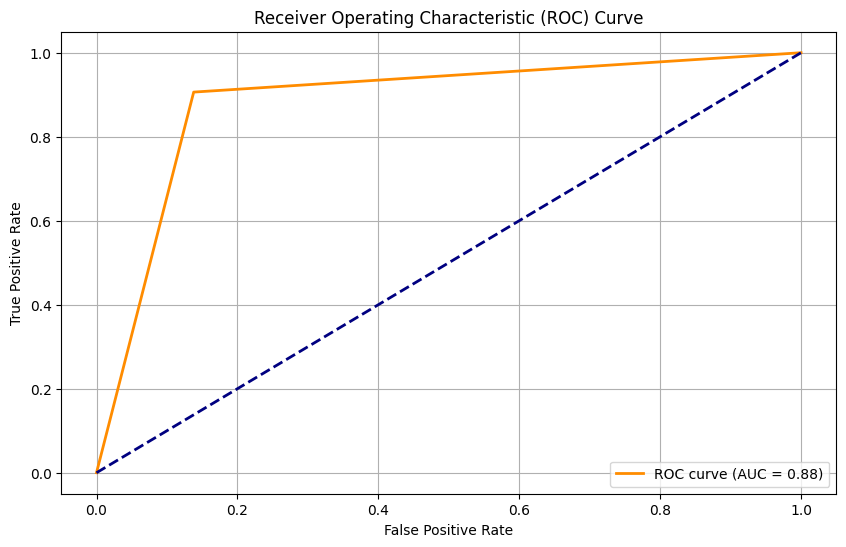

In [46]:
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_RF)
roc_auc = auc(fpr, tpr)

# Calculate precision-recall curve and AUC
precision, recall, _ = precision_recall_curve(y_test, y_pred_RF)
average_precision = average_precision_score(y_test, y_pred_RF)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

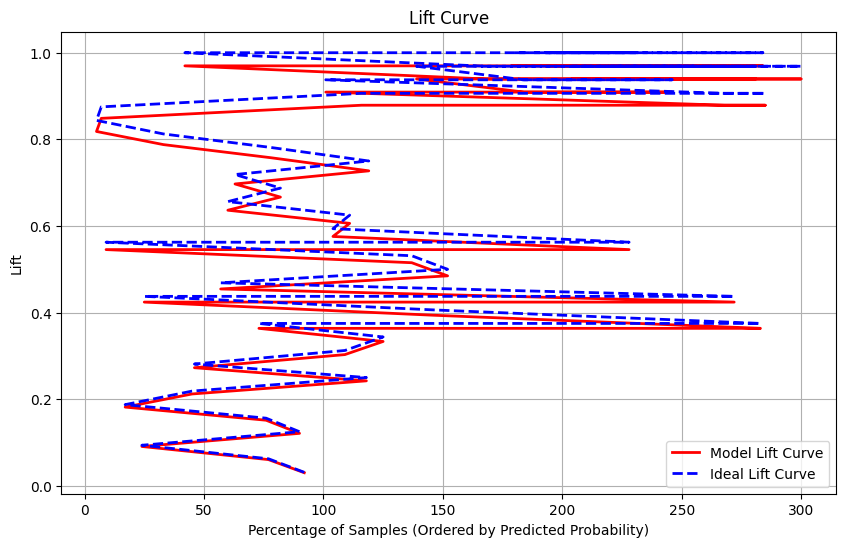

In [47]:
# Sort indices based on predicted probabilities
indices = np.argsort(y_pred_RF)[::-1]
sorted_y_test = y_test.iloc[indices]

# Calculate cumulative positive instances
cumulative_positives = np.cumsum(sorted_y_test)

# Calculate the ideal lift 
ideal_lift = cumulative_positives / sum(y_test)

# Calculate the actual lift to the model
model_lift = cumulative_positives / sum(y_pred_RF)

# Plot the Lift Curve
plt.figure(figsize=(10, 6))
plt.plot(model_lift, label='Model Lift Curve', linewidth=2, color="red")
plt.plot(ideal_lift, label='Ideal Lift Curve', linestyle='--', color='blue', linewidth=2)
plt.xlabel('Percentage of Samples (Ordered by Predicted Probability)')
plt.ylabel('Lift')
plt.title('Lift Curve')
plt.legend()
plt.grid(True)
plt.show()


### AdaBoostClassifier

In [48]:
# tunning the hyperparameters to AdaBoostClassifier model
AdaBoostClf = AdaBoostClassifier()

param = {
    "n_estimators" : np.arange(50, 200, 30),
    "learning_rate" : np.arange(0.1, 1, 0.2)
}

AdaBoostClf_grid = GridSearchCV(estimator=AdaBoostClf, param_grid=param, scoring="precision", n_jobs=-1, cv=5)
# fitting 

AdaBoostClf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': array([0.1, 0.3, 0.5, 0.7, 0.9]),
                         'n_estimators': array([ 50,  80, 110, 140, 170])},
             scoring='precision')

In [49]:
# show the best params
AdaBoostClf_grid.best_params_

{'learning_rate': 0.1, 'n_estimators': 140}

In [50]:
# the final model 
AdaBoostClf_final = AdaBoostClf_grid.best_estimator_

the scores is ==> [0.74193548 0.88888889 0.75862069 0.84615385 0.82608696]
the mean to the scores is ==> 0.8123371730181228
****************************************************************************************************


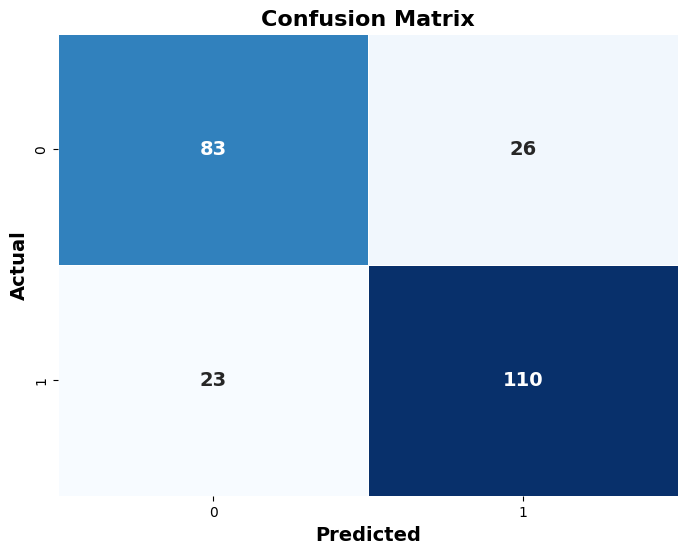

In [51]:
# make croos validation
croos_val = cross_val_score(estimator=AdaBoostClf_final, X=X_train, y=y_train,
                            cv=5, scoring="precision", n_jobs=-1)
# print the croos val for every fold
print(f"the scores is ==> {croos_val}")

# show the mean for the scores
print(f"the mean to the scores is ==> {croos_val.mean()}")

print("**"*50)

# make croos validation to predict
croos_val_pred = cross_val_predict(estimator=AdaBoostClf_final, X=X_train, y=y_train, 
                                   cv=5, method="predict", n_jobs=-1 )

# Compute the confusion matrix
confusion = confusion_matrix(y_train, croos_val_pred)

# Create a heatmap with Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'size': 14, 'weight': 'bold'}, linewidths=.5)

# Customize labels and title
plt.xlabel('Predicted', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=14, fontweight='bold')
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.show()


In [52]:
# show the feature importance 
importance = AdaBoostClf_final.feature_importances_
importance

array([0.03571429, 0.1       , 0.1       , 0.02857143, 0.13571429,
       0.        , 0.        , 0.06428571, 0.02857143, 0.09285714,
       0.07857143, 0.14285714, 0.08571429, 0.07142857, 0.01428571,
       0.02142857, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [53]:
# the scores
print(f"the score in the train is {AdaBoostClf_final.score(X_train, y_train)}")
print(f"the score in the test is {AdaBoostClf_final.score(X_test, y_test)}")

the score in the train is 0.8842975206611571
the score in the test is 0.819672131147541


In [54]:
# prediction
y_pred_ِAda = AdaBoostClf_final.predict(X_test)
pd.DataFrame(np.c_[y_pred_ِAda, y_test], columns=["prediction", "Actual"])

,prediction,Actual
0,0,0
1,1,0
2,0,1
3,1,0
4,1,1
...,...,...
56,0,0
57,1,1
58,0,0
59,0,0


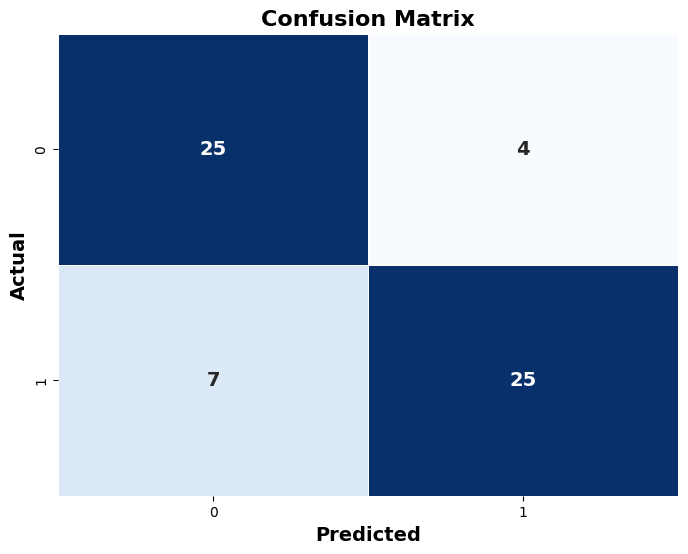

In [55]:
# Compute the confusion matrix
confusion = confusion_matrix(y_test, y_pred_ِAda)

# Create a heatmap with Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'size': 14, 'weight': 'bold'}, linewidths=.5)

# Customize labels and title
plt.xlabel('Predicted', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=14, fontweight='bold')
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.show()


In [56]:
print("\033[1mThe Classification Report on Test Data\033[0m\n")
classification_rep = classification_report(y_test, y_pred_ِAda)
print(classification_rep)

The Classification Report on Test Data

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        29
           1       0.86      0.78      0.82        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



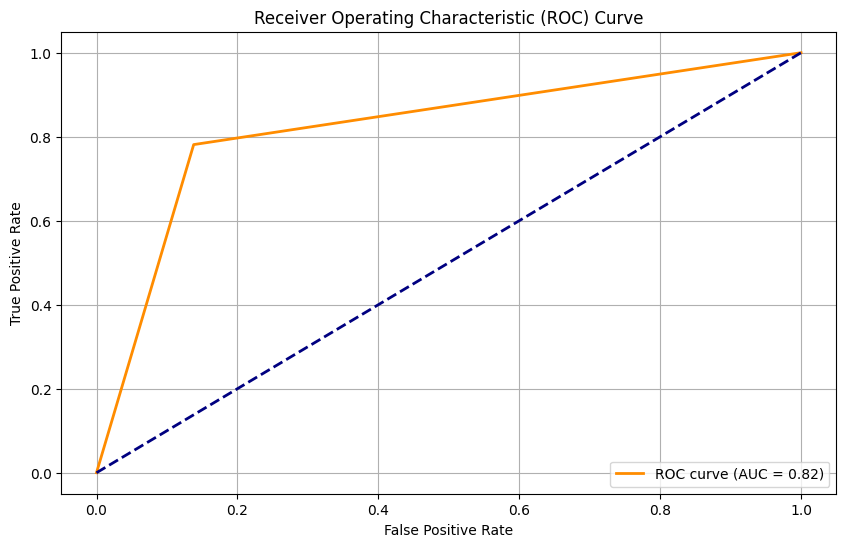

In [57]:
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_ِAda)
roc_auc = auc(fpr, tpr)

# Calculate precision-recall curve and AUC
precision, recall, _ = precision_recall_curve(y_test, y_pred_ِAda)
average_precision = average_precision_score(y_test, y_pred_ِAda)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

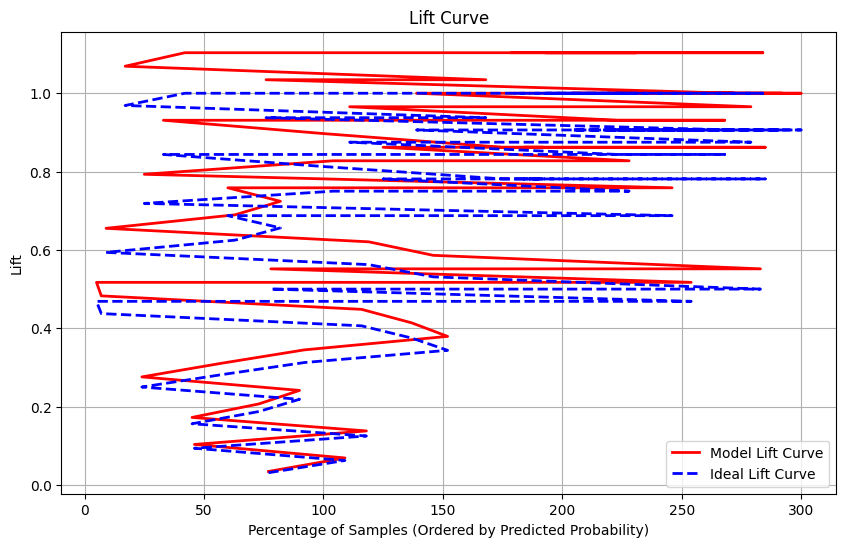

In [58]:
# Sort indices based on predicted probabilities
indices = np.argsort(y_pred_ِAda)[::-1]
sorted_y_test = y_test.iloc[indices]

# Calculate cumulative positive instances
cumulative_positives = np.cumsum(sorted_y_test)

# Calculate the ideal lift 
ideal_lift = cumulative_positives / sum(y_test)

# Calculate the actual lift to the model
model_lift = cumulative_positives / sum(y_pred_ِAda)

# Plot the Lift Curve
plt.figure(figsize=(10, 6))
plt.plot(model_lift, label='Model Lift Curve', linewidth=2, color="red")
plt.plot(ideal_lift, label='Ideal Lift Curve', linestyle='--', color='blue', linewidth=2)
plt.xlabel('Percentage of Samples (Ordered by Predicted Probability)')
plt.ylabel('Lift')
plt.title('Lift Curve')
plt.legend()
plt.grid(True)
plt.show()


### XGboost

In [59]:
Xgb_cls = xgb.XGBClassifier()

params = {
    "n_estimators" : np.arange(50, 200, 10),
    "max_depth" : np.arange(2, 10, 1),
    "learning_rate" : np.arange(0.1, 1, 0.1),
    "subsample" : np.arange(0.2, 1, 0.25),
    "alpha" :  np.arange(0.1, 1, 0.1)
}

Xgb_cls_grid = RandomizedSearchCV(estimator=Xgb_cls, param_distributions=params, n_jobs=-1,
                                  cv=5, scoring="precision", n_iter=500)


# fitting
Xgb_cls_grid.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           random_state=None, ...),
                   n_iter=500, n_jobs=-1,
                   param_distributions={'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160, 170,
       180, 190]),
                                        'subsample': array([0.2 , 0.45, 0.7 , 0.95])},
                   scoring='precision')

In [60]:
# show the best params
Xgb_cls_grid.best_params_

{'subsample': 0.2,
 'n_estimators': 150,
 'max_depth': 6,
 'learning_rate': 0.1,
 'alpha': 0.30000000000000004}

In [61]:
# the final model
Xgb_cls_final = Xgb_cls_grid.best_estimator_

the scores is ==> [0.82142857 0.85185185 0.80645161 0.85714286 0.9047619 ]
the mean to the scores is ==> 0.8483273596176822
****************************************************************************************************


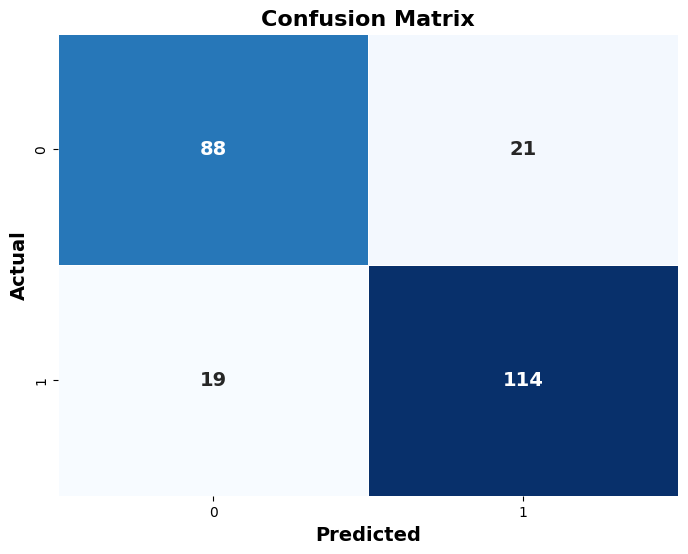

In [62]:
# make croos validation
croos_val = cross_val_score(estimator=Xgb_cls_final, X=X_train, y=y_train,
                            cv=5, scoring="precision", n_jobs=-1)
# print the croos val for every fold
print(f"the scores is ==> {croos_val}")

# show the mean for the scores
print(f"the mean to the scores is ==> {croos_val.mean()}")

print("**"*50)

# make croos validation to predict
croos_val_pred = cross_val_predict(estimator=Xgb_cls_final, X=X_train, y=y_train, 
                                   cv=5, method="predict", n_jobs=-1 )

# Compute the confusion matrix
confusion = confusion_matrix(y_train, croos_val_pred)

# Create a heatmap with Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'size': 14, 'weight': 'bold'}, linewidths=.5)

# Customize labels and title
plt.xlabel('Predicted', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=14, fontweight='bold')
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.show()

In [63]:
# the scores
print(f"the score in the train is {Xgb_cls_final.score(X_train, y_train)}")
print(f"the score in the test is {Xgb_cls_final.score(X_test, y_test)}")

the score in the train is 0.9214876033057852
the score in the test is 0.8524590163934426


In [64]:
# prediction
y_pred_ِXGb = AdaBoostClf_final.predict(X_test)
pd.DataFrame(np.c_[y_pred_ِXGb, y_test], columns=["prediction", "Actual"])

,prediction,Actual
0,0,0
1,1,0
2,0,1
3,1,0
4,1,1
...,...,...
56,0,0
57,1,1
58,0,0
59,0,0


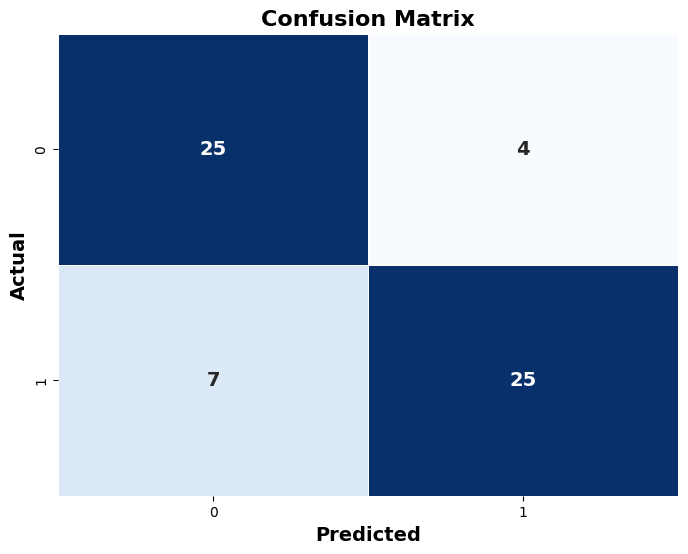

In [65]:
# Compute the confusion matrix
confusion = confusion_matrix(y_test, y_pred_ِXGb)

# Create a heatmap with Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'size': 14, 'weight': 'bold'}, linewidths=.5)

# Customize labels and title
plt.xlabel('Predicted', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=14, fontweight='bold')
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.show()


In [66]:
print("\033[1mThe Classification Report on Test Data\033[0m\n")
classification_rep = classification_report(y_test, y_pred_ِXGb)
print(classification_rep)

The Classification Report on Test Data

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        29
           1       0.86      0.78      0.82        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



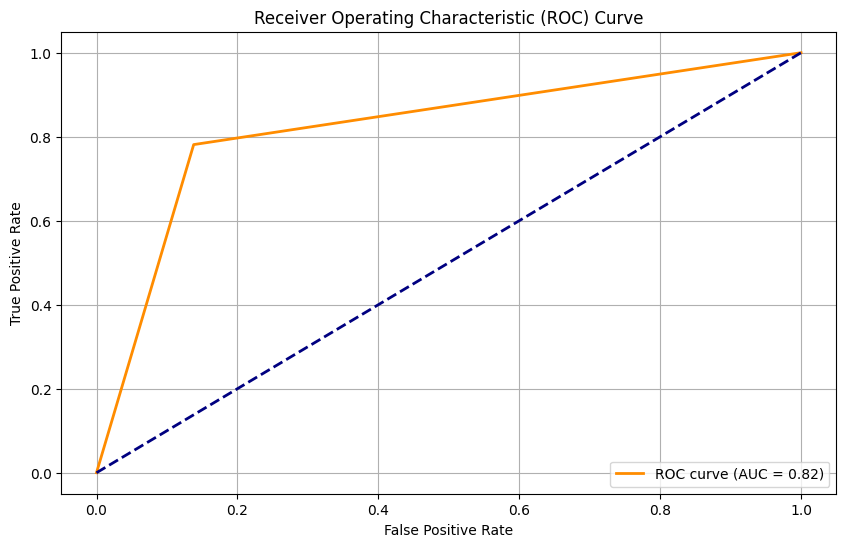

In [67]:
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_ِXGb)
roc_auc = auc(fpr, tpr)

# Calculate precision-recall curve and AUC
precision, recall, _ = precision_recall_curve(y_test, y_pred_ِXGb)
average_precision = average_precision_score(y_test, y_pred_ِXGb)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

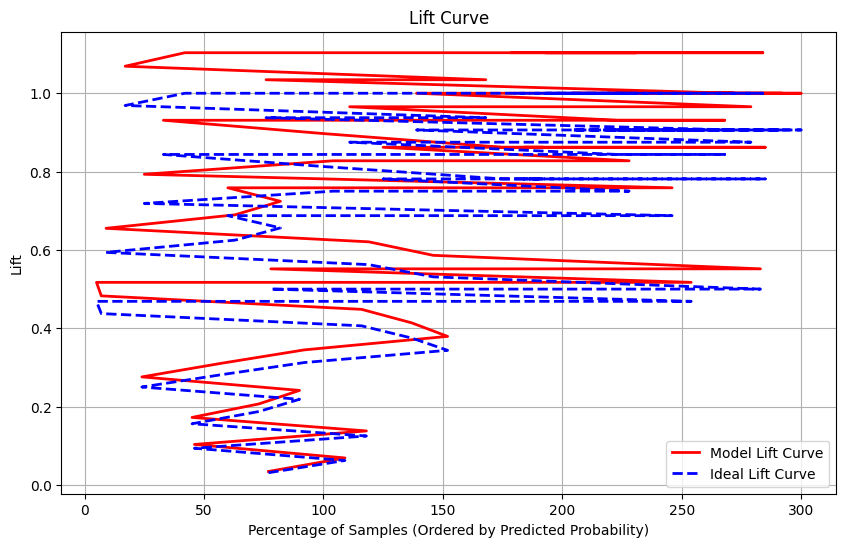

In [68]:
# Sort indices based on predicted probabilities
indices = np.argsort(y_pred_ِXGb)[::-1]
sorted_y_test = y_test.iloc[indices]

# Calculate cumulative positive instances
cumulative_positives = np.cumsum(sorted_y_test)

# Calculate the ideal lift 
ideal_lift = cumulative_positives / sum(y_test)

# Calculate the actual lift to the model
model_lift = cumulative_positives / sum(y_pred_ِXGb)

# Plot the Lift Curve
plt.figure(figsize=(10, 6))
plt.plot(model_lift, label='Model Lift Curve', linewidth=2, color="red")
plt.plot(ideal_lift, label='Ideal Lift Curve', linestyle='--', color='blue', linewidth=2)
plt.xlabel('Percentage of Samples (Ordered by Predicted Probability)')
plt.ylabel('Lift')
plt.title('Lift Curve')
plt.legend()
plt.grid(True)
plt.show()


## `Deep Learning`

In [69]:
from tensorflow.keras.utils import to_categorical

num_classes = len(np.unique(y_train))
y_train_encoded = to_categorical(y_train, num_classes=num_classes)
y_test_encoded = to_categorical(y_test, num_classes=num_classes)


input_shape = X_train.shape[1]

# Model Definition
model = Sequential()
model.add(Dense(128, input_shape=(input_shape,), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))

# Output layer for multi-class classification
model.add(Dense(num_classes, activation='softmax'))

# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Training the model
history = model.fit(X_train, y_train_encoded, epochs=100, batch_size=32,
                    validation_data=(X_test, y_test_encoded), verbose=1, callbacks=[early_stop])


Epoch 1/100
8/8 [==============================] - 1s 39ms/step - loss: 0.7138 - accuracy: 0.4876 - val_loss: 0.6419 - val_accuracy: 0.7213
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6282 - accuracy: 0.6983 - val_loss: 0.5622 - val_accuracy: 0.8525
Epoch 3/100
8/8 [==============================] - 0s 9ms/step - loss: 0.5472 - accuracy: 0.7727 - val_loss: 0.4797 - val_accuracy: 0.8689
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 0.4799 - accuracy: 0.8140 - val_loss: 0.4167 - val_accuracy: 0.8525
Epoch 5/100
8/8 [==============================] - 0s 7ms/step - loss: 0.4267 - accuracy: 0.8140 - val_loss: 0.3760 - val_accuracy: 0.8525
Epoch 6/100
8/8 [==============================] - 0s 8ms/step - loss: 0.4001 - accuracy: 0.8306 - val_loss: 0.3654 - val_accuracy: 0.8689
Epoch 7/100
8/8 [==============================] - 0s 8ms/step - loss: 0.3772 - accuracy: 0.8306 - val_loss: 0.3746 - val_accuracy: 0.8689
Epoch 8/100
8/8 [=========

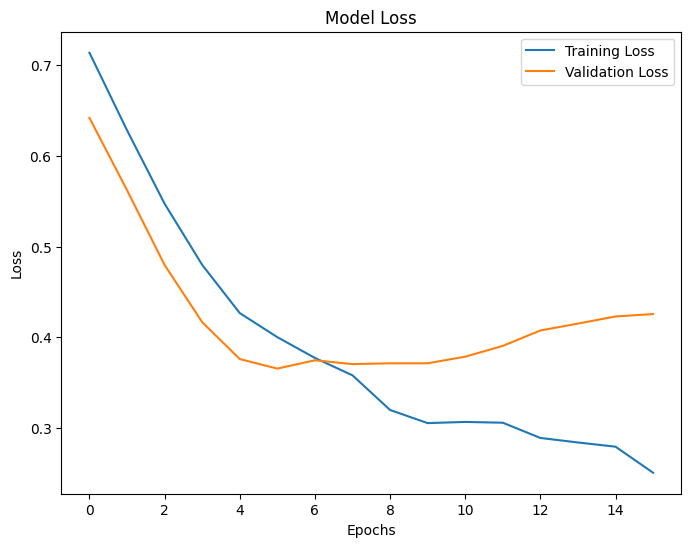

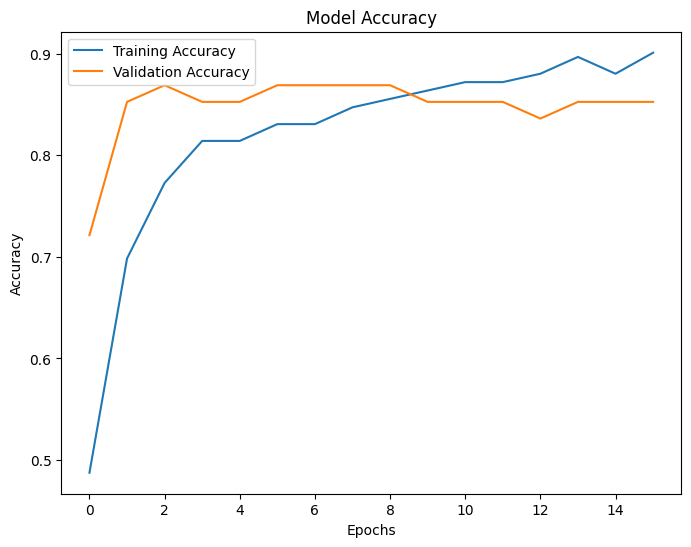

In [70]:
# Visualization: Plotting training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Visualization: Plotting training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [71]:
# Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test_encoded, verbose=0)
print(f"Accuracy on Test Data: {accuracy}")

Accuracy on Test Data: 0.868852436542511


In [72]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1) 
pd.DataFrame(np.c_[y_pred_classes, y_test], columns=["prediction", "Actual"])

2/2 [==============================] - 0s 3ms/step


,prediction,Actual
0,0,0
1,1,0
2,1,1
3,0,0
4,1,1
...,...,...
56,0,0
57,1,1
58,0,0
59,0,0


In [73]:
print("\033[1mThe Classification Report on Test Data\033[0m\n")
classification_rep = classification_report(y_test, y_pred_classes)
print(classification_rep)

The Classification Report on Test Data

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



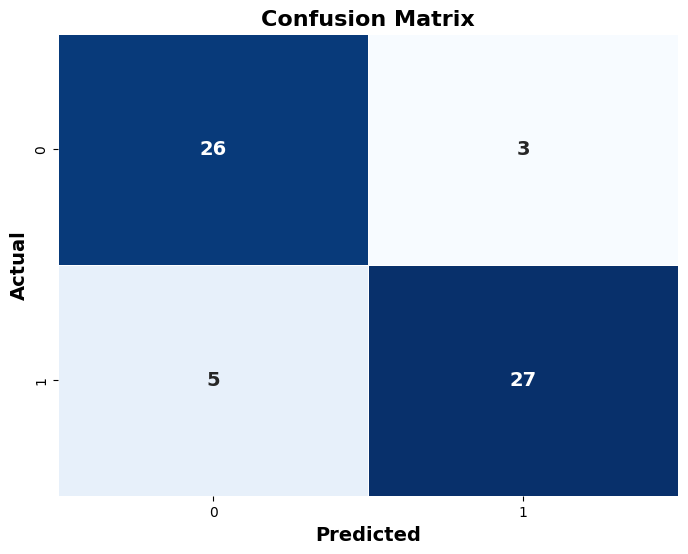

In [74]:
# Compute the confusion matrix
confusion = confusion_matrix(y_test, y_pred_classes)

# Create a heatmap with Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'size': 14, 'weight': 'bold'}, linewidths=.5)

# Customize labels and title
plt.xlabel('Predicted', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=14, fontweight='bold')
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.show()


## By: Mohammed Hamza